# Airline Passenger Satisfaction Project

Customer satisfaction is vital in the airline industry, where competition is fierce and service quality drives loyalty. This project uses machine learning to predict whether a customer is "Satisfied" or "Neutral/Unhappy" based on factors like age, travel type, class, flight distance, and service ratings (e.g., inflight service, cleanliness, entertainment, and booking ease). The goal is to identify key pain points, uncover patterns in passenger feedback, and help airlines improve services through data-driven insights.



In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings as ww
ww.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Data.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
len(df)

129880

In [ ]:
# Shape of the dataset
df.shape

(129880, 24)

In [ ]:
# Summary statistics for numerical features
df.describe()

,ID,Age,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Columns
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [ ]:
# Checking for duplicated
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
# Data Type of each column
df.dtypes

,0
ID,int64
Gender,object
Age,int64
Customer Type,object
Type of Travel,object
Class,object
Flight Distance,object
Departure Delay,int64
Arrival Delay,float64
Departure and Arrival Time Convenience,int64


In [ ]:
df['Flight Distance']

,Flight Distance
0,821
1,821
2,853
3,1905
4,3470
...,...
129875,447
129876,308
129877,337
129878,337


In [ ]:
df['Flight Distance'] = df['Flight Distance'].str.replace(r'\D', '', regex=True)

In [ ]:
# Number of unique values in each column
df.nunique()

,0
ID,129880
Gender,2
Age,75
Customer Type,2
Type of Travel,2
Class,3
Flight Distance,3103
Departure Delay,466
Arrival Delay,472
Departure and Arrival Time Convenience,6


In [ ]:
# Missing values in each column
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,97112
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [ ]:
# Missing values in each column as a percentage
df.isnull().sum()*100/len(df)

,0
ID,0.000000
Gender,0.000000
Age,0.000000
Customer Type,0.000000
Type of Travel,0.000000
Class,0.000000
Flight Distance,74.770557
Departure Delay,0.000000
Arrival Delay,0.302587
Departure and Arrival Time Convenience,0.000000


In [ ]:
df = df.drop(columns=['Flight Distance'])

In [ ]:
# Checking for outliers
q1=df['Arrival Delay'].quantile(0.25)
q3=df['Arrival Delay'].quantile(0.75)

IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

outliers=df[(df['Arrival Delay']<lower_bound) | (df['Arrival Delay']>upper_bound)]
len(outliers)

17492

In [ ]:
# Imputing missing value in Age with median
df['Arrival Delay']=df['Arrival Delay'].fillna(df['Arrival Delay'].median())

In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0
Ease of Online Booking,0


In [ ]:
df['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,73452
Satisfied,56428


In [ ]:
df = df.drop(columns=['ID'])

In [ ]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,2,5.0,3,3,4,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,26,39.0,2,2,3,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,0,0.0,4,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,0,0.0,2,2,3,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,0,1.0,3,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type Columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type Columns:
Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

Numerical type columns:
Index(['Age', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling'],
      dtype='object')


In [ ]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,2,5.0,3,3,4,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,26,39.0,2,2,3,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,0,0.0,4,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,0,0.0,2,2,3,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,0,1.0,3,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
for i in object_columns:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Female']

Customer Type
['First-time' 'Returning']

Type of Travel
['Business' 'Personal']

Class
['Business' 'Economy' 'Economy Plus']

Satisfaction
['Neutral or Dissatisfied' 'Satisfied']



In [ ]:
for i in object_columns:
    print(df[i].value_counts())
    print()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64



# Visualization of the preprocessed Data

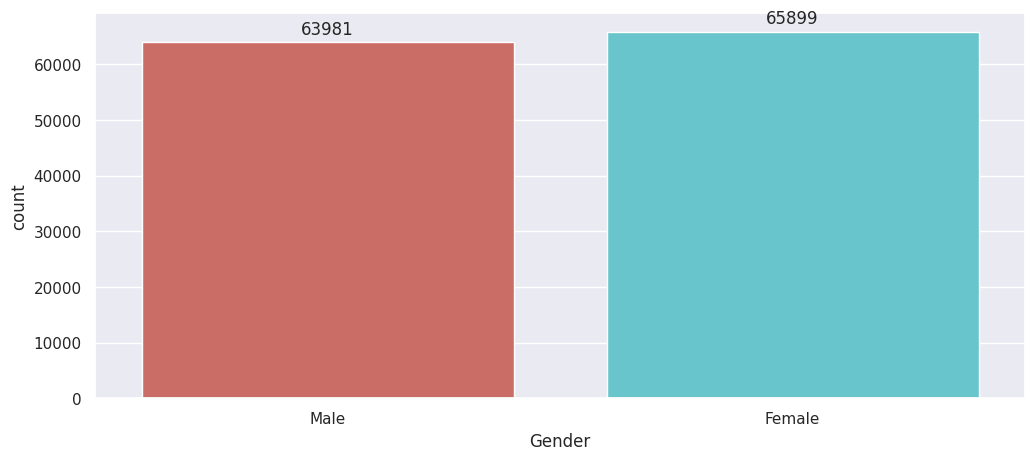

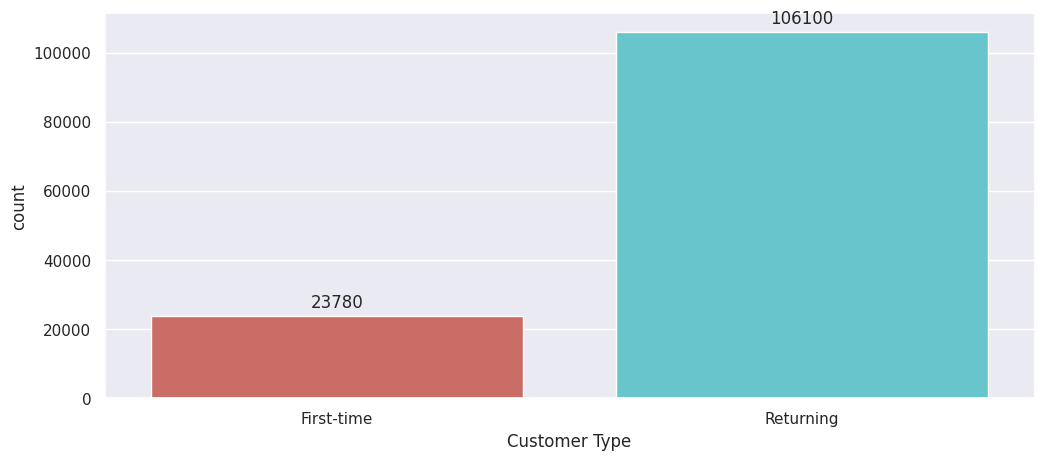

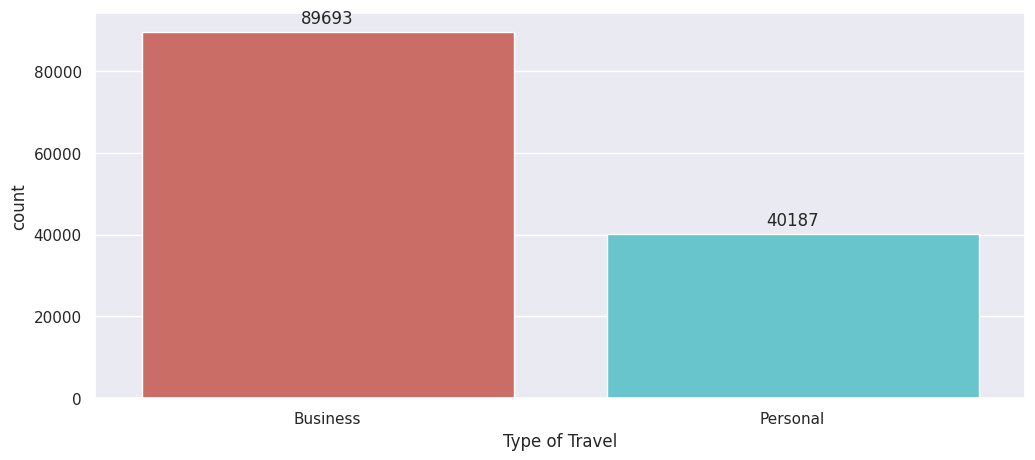

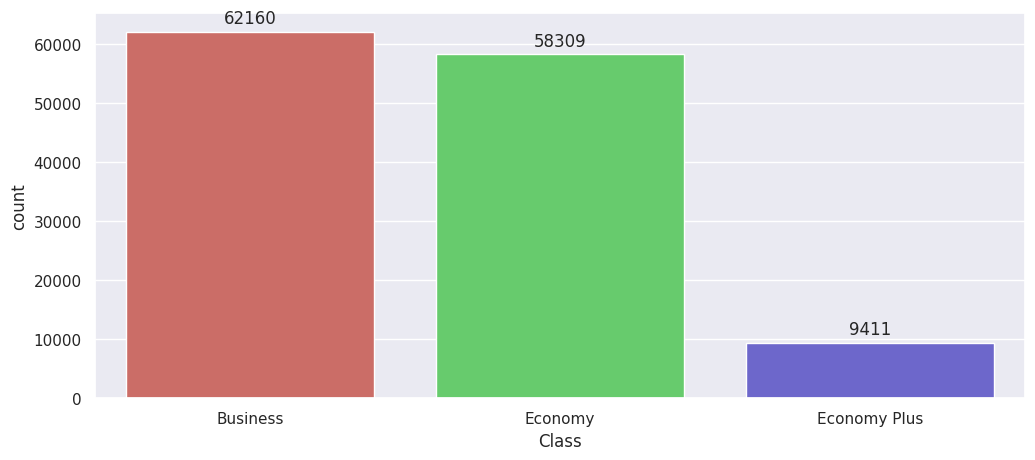

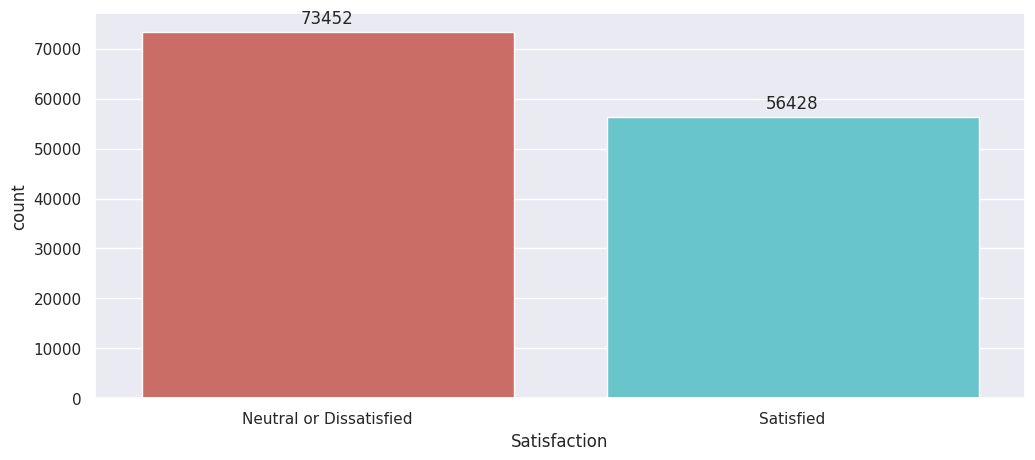

In [ ]:
for col in object_columns:
    plt.figure(figsize=(12,5))
    ax = sns.countplot(x=col, data=df, palette='hls')

    for p in ax.containers:
        ax.bar_label(p,label_type='edge', padding=3)

    plt.show()


In [ ]:
import plotly.express as px

for col in object_columns:
    fig = px.pie(df, names=col, title=f'Distribution of {col}')
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

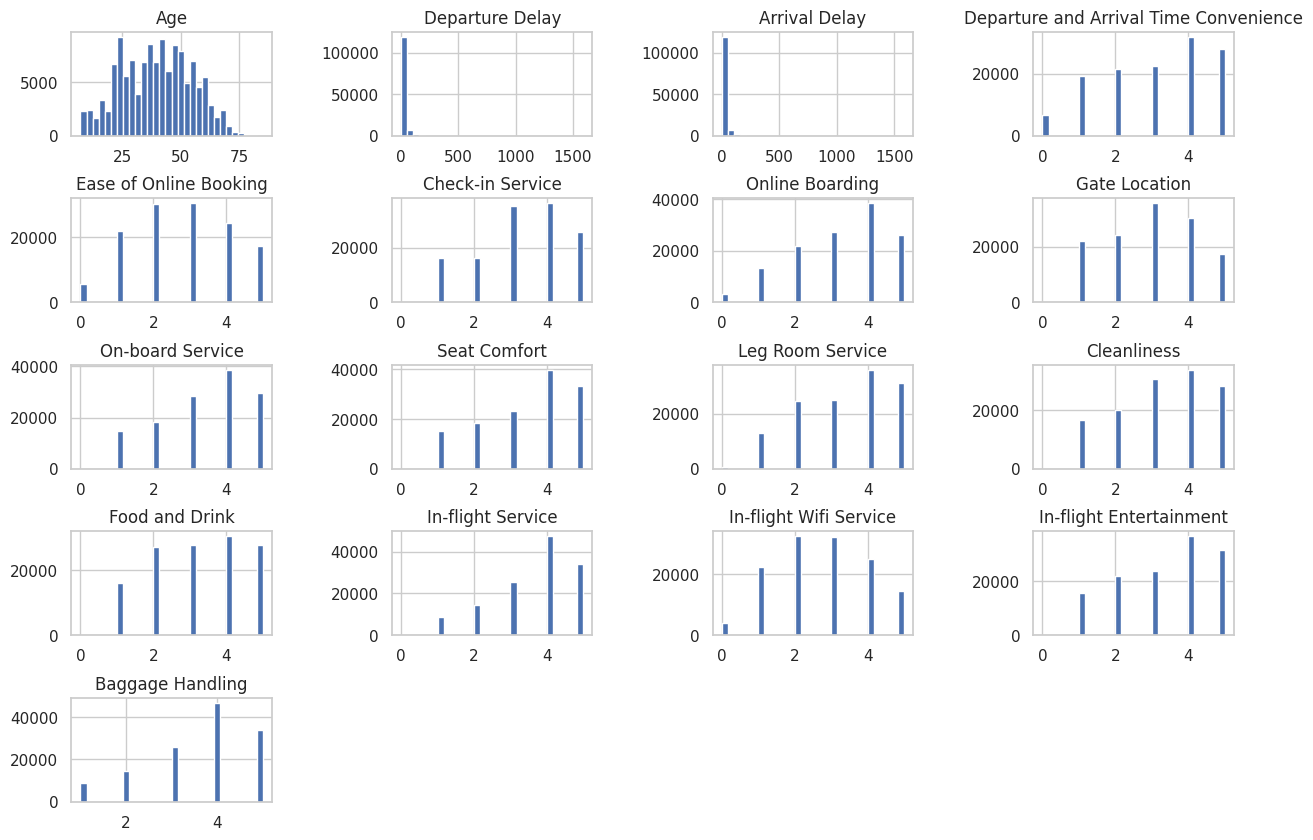

In [ ]:
sns.set(style='whitegrid')
df.hist(bins=30,figsize=(15,10))
plt.title('Histogram of numerical features')
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.show()

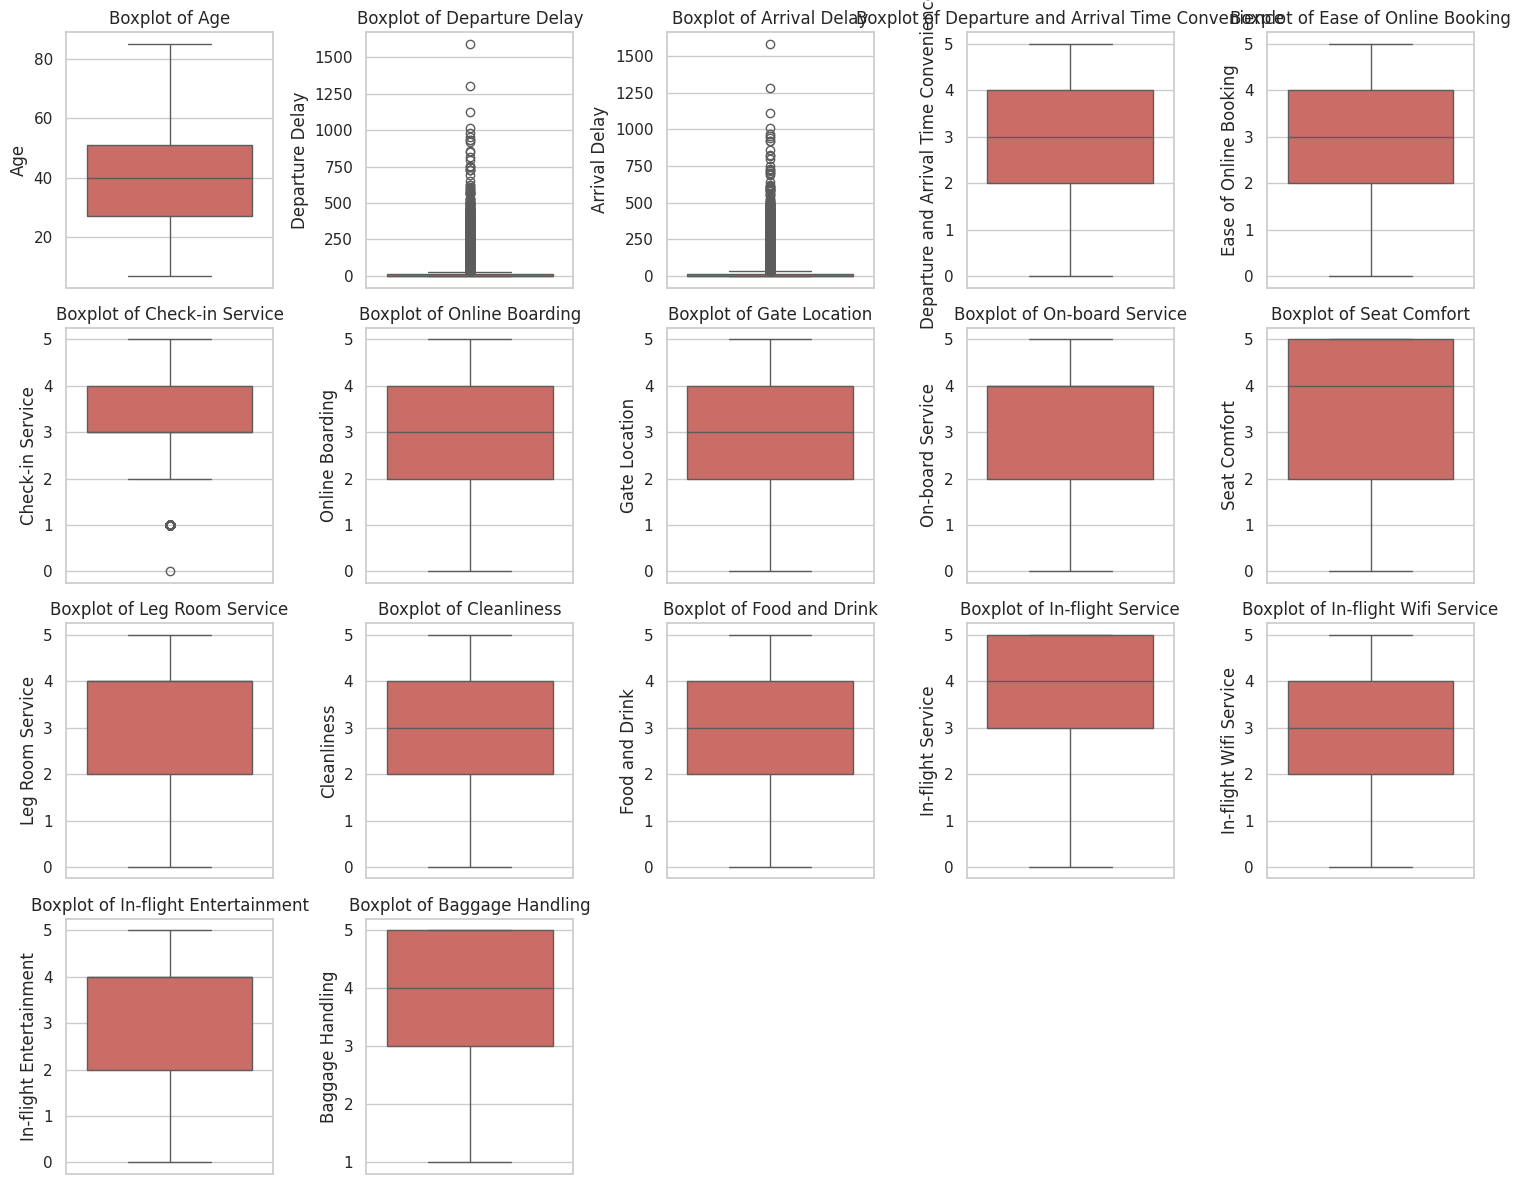

In [ ]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=df[column], palette='hls')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

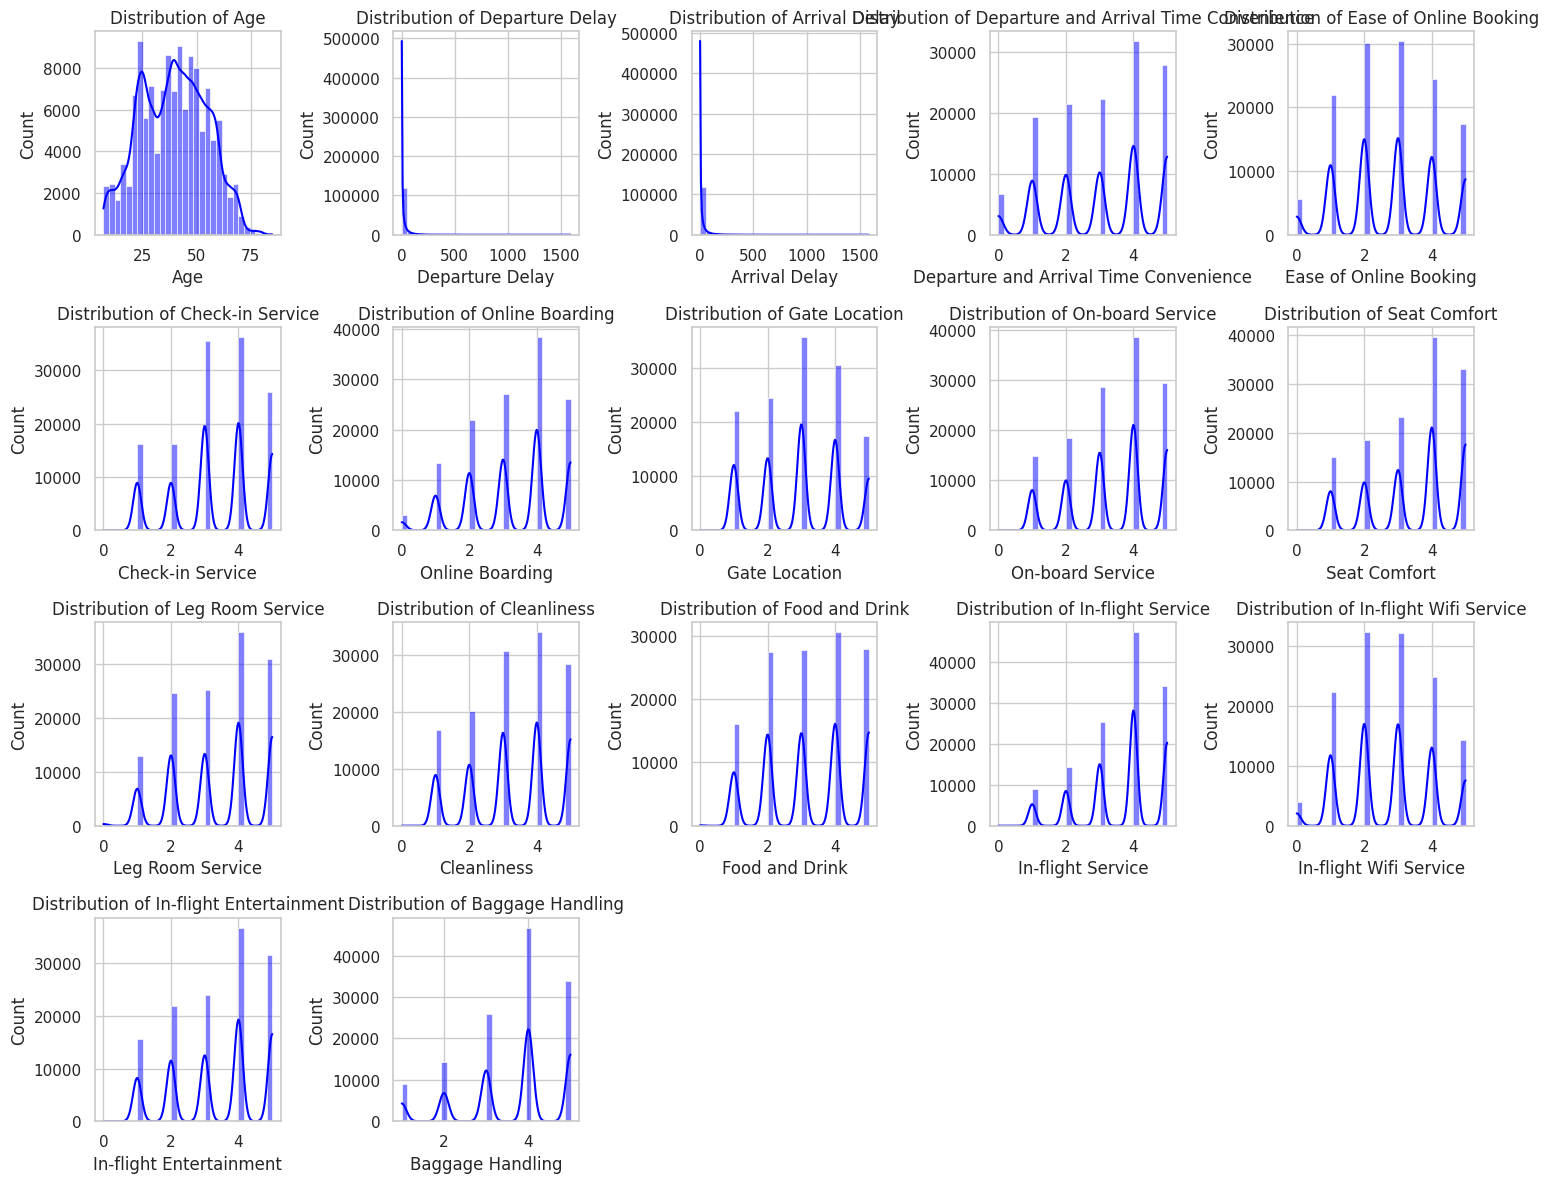

In [ ]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

In [ ]:
for dis in object_columns:
    for cont in numerical_columns:
        plt.figure(figsize=(10,6))
        ax = sns.boxplot(data=df, x=dis, y=cont)
        plt.title(f"{dis} vs {cont}")
        plt.xticks(rotation=90)
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Encoding

In [ ]:
df[['Customer Type', 'Gender','Type of Travel']] = df[['Customer Type','Type of Travel','Gender']].astype(str)
df_encoded = pd.get_dummies(df, columns=['Customer Type','Type of Travel', 'Gender'], dtype=int,drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to the 'Class' column in df_encoded
df_encoded['Class'] = encoder.fit_transform(df_encoded['Class'])
df_encoded['Satisfaction'] = encoder.fit_transform(df_encoded['Satisfaction'])

In [ ]:
df_encoded.head()

,Age,Class,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Customer Type_Returning,Type of Travel_Male,Gender_Personal
0,48,0,2,5.0,3,3,4,3,3,3,...,5,5,5,3,5,5,0,0,1,0
1,35,0,26,39.0,2,2,3,5,2,5,...,5,3,5,2,5,5,1,1,0,0
2,41,0,0,0.0,4,4,4,5,4,3,...,5,5,3,4,3,3,1,1,1,0
3,50,0,0,0.0,2,2,3,4,2,5,...,4,4,5,2,5,5,1,1,1,0
4,49,0,0,1.0,3,3,3,5,3,3,...,5,4,3,3,3,3,1,1,0,0


In [ ]:
df_encoded['Satisfaction'].value_counts()

,count
Satisfaction,
0,73452
1,56428


# Does Arrival Delay impact Satisfaction level?

In [ ]:
from scipy.stats import f_oneway

satisfied= df_encoded[df_encoded['Satisfaction'] == 1]['Arrival Delay']
not_satisfied = df_encoded[df_encoded['Satisfaction'] == 0]['Arrival Delay']

f_stat, p_value = f_oneway(satisfied, not_satisfied)

print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA Result: F-statistic = 440.58545905238384, p-value = 1.1740064936261996e-97


In [ ]:
if p_value <= 0.05:
    print("Arrival Delay significantly impacts Satisfaction level.")
else:
    print("Arrival Delay does not significantly impact Satisfaction level")

Arrival Delay significantly impacts Satisfaction level.


# Does Gender impact Satisfaction?

In [ ]:
table=pd.crosstab(df['Gender'],df['Satisfaction'])
table

Satisfaction,Neutral or Dissatisfied,Satisfied
Gender,,
Business,37337,52356
Personal,36115,4072


In [ ]:
from scipy.stats import chi2_contingency
chi,p,dof,ex=chi2_contingency(table)
print(chi,p)
if p<=0.05:
    print('Gender does impact Satisfaction level')
else:
    print('Gender does not impact Satisfaction level')

26282.520993423812 0.0
Gender does impact Satisfaction level


# Does Departure Delay impact Satisfaction Level?

In [ ]:
from scipy.stats import f_oneway

satisfied= df_encoded[df_encoded['Satisfaction'] == 1]['Departure Delay']
not_satisfied = df_encoded[df_encoded['Satisfaction'] == 0]['Departure Delay']

f_stat, p_value = f_oneway(satisfied, not_satisfied)

print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA Result: F-statistic = 335.2384091246109, p-value = 8.634339211927482e-75


In [ ]:
if p_value <= 0.05:
    print("Departure Delay significantly impacts Satisfaction level.")
else:
    print("Departure Delay does not significantly impact Satisfaction level.")

Departure Delay significantly impacts Satisfaction level.


# Does Class impact Satisfaction level?

In [ ]:
contingency_table = pd.crosstab(df_encoded['Class'], df_encoded['Satisfaction'])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the result
print(f"Chi-square Result: chi2-statistic = {chi2_stat}, p-value = {p_val}")

Chi-square Result: chi2-statistic = 32906.17185866312, p-value = 0.0


In [ ]:
if p<=0.05:
    print('Class does impact Satisfaction level')
else:
    print('Class does not impact Satisfaction level')

Class does impact Satisfaction level


# Does Cleanliness impact Saisfaction?

In [ ]:
df['Cleanliness'].value_counts()

,count
Cleanliness,
4,33969
3,30639
5,28416
2,20113
1,16729
0,14


In [ ]:
from scipy.stats import f_oneway

# Split the data based on Satisfaction
satisfied = df_encoded[df_encoded['Satisfaction'] == 1]['Cleanliness']
unsatisfied = df_encoded[df_encoded['Satisfaction'] == 0]['Cleanliness']

# Perform ANOVA
f_stat, p_value = f_oneway(satisfied, unsatisfied)

# Print the result
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA Result: F-statistic = 13517.980514172456, p-value = 0.0


In [ ]:
if p_value <= 0.05:
    print("Cleanliness significantly impacts Satisfaction level.")
else:
    print("Cleanliness does not significantly impact Satisfaction level.")

Cleanliness significantly impacts Satisfaction level.


# Does Baggage Handling impact Satisfaction?

In [ ]:
# Split the data based on Satisfaction
satisfied = df_encoded[df_encoded['Satisfaction'] == 1]['Baggage Handling']
unsatisfied = df_encoded[df_encoded['Satisfaction'] == 0]['Baggage Handling']

# Perform ANOVA
f_stat, p_value = f_oneway(satisfied, unsatisfied)

# Print the result
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA Result: F-statistic = 8561.323381946166, p-value = 0.0


In [ ]:
if p_value <= 0.05:
    print("Baggage Handling significantly impacts Satisfaction level.")
else:
    print("Baggage Handling does not significantly impact Satisfaction level.")

Baggage Handling significantly impacts Satisfaction level.


In [ ]:
df_encoded.head(3)

,Age,Class,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Customer Type_Returning,Type of Travel_Male,Gender_Personal
0,48,0,2,5.0,3,3,4,3,3,3,...,5,5,5,3,5,5,0,0,1,0
1,35,0,26,39.0,2,2,3,5,2,5,...,5,3,5,2,5,5,1,1,0,0
2,41,0,0,0.0,4,4,4,5,4,3,...,5,5,3,4,3,3,1,1,1,0


# Outlier Treatment

In [ ]:
len(df_encoded)

129880

In [ ]:
import pandas as pd

# Example DataFrame (replace this with your actual df_encoded)
# df_encoded = pd.read_csv("your_file.csv")

# Calculate IQR
Q1 = df_encoded.quantile(0.25)
Q3 = df_encoded.quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization
for col in df_encoded.select_dtypes(include='number').columns:
    df_encoded[col] = df_encoded[col].clip(lower=lower_bound[col], upper=upper_bound[col])


In [ ]:
len(df_encoded)

129880

# Satisfaction is Target variable

In [ ]:
# Split the data into independent and dependent variable
x=df_encoded.drop(columns=['Satisfaction'],axis=1)
y=df_encoded['Satisfaction']

In [ ]:
x.head()

,Age,Class,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Customer Type_Returning,Type of Travel_Male,Gender_Personal
0,48,0,2,5.0,3,3,4.0,3,3,3,...,2,5,5,5,3,5,5,1,1,0
1,35,0,26,32.5,2,2,3.0,5,2,5,...,5,5,3,5,2,5,5,1,0,0
2,41,0,0,0.0,4,4,4.0,5,4,3,...,3,5,5,3,4,3,3,1,1,0
3,50,0,0,0.0,2,2,3.0,4,2,5,...,5,4,4,5,2,5,5,1,1,0
4,49,0,0,1.0,3,3,3.0,5,3,3,...,4,5,4,3,3,3,3,1,0,0


In [ ]:
y.head()

,Satisfaction
0,0
1,1
2,1
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)

In [ ]:
y_train.value_counts()

,count
Satisfaction,
0,58762
1,45142


# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.85
Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     14690
           1       0.83      0.83      0.83     11286

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976



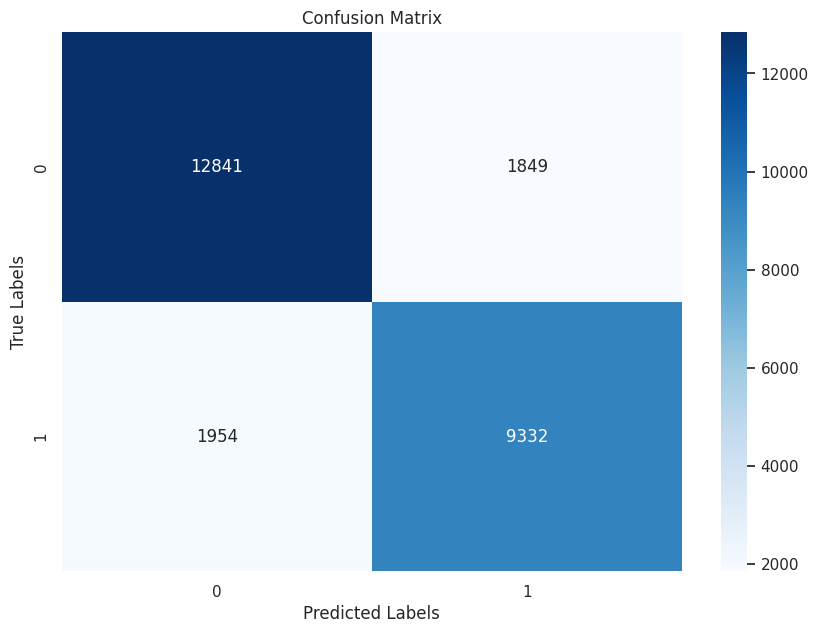

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.94
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14690
           1       0.93      0.93      0.93     11286

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



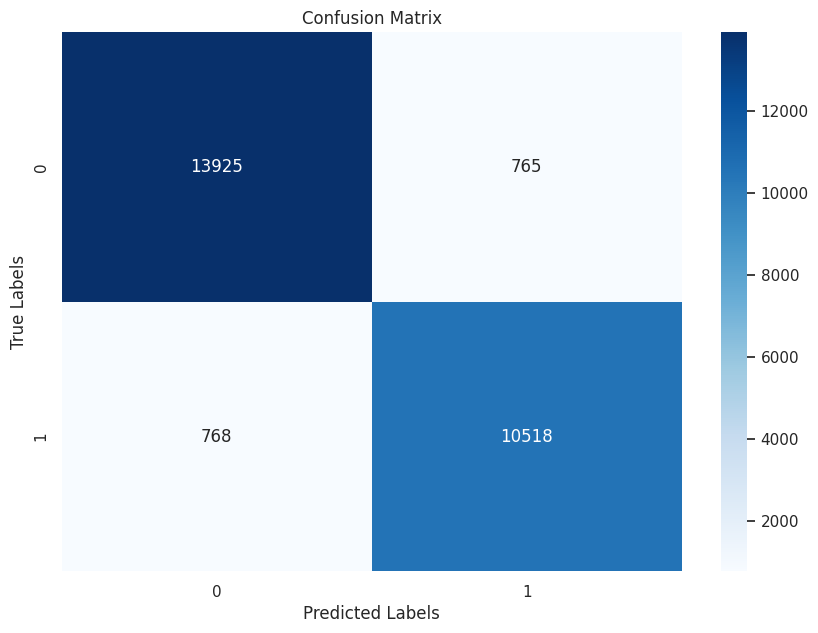

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.89
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14690
           1       0.90      0.84      0.86     11286

    accuracy                           0.89     25976
   macro avg       0.89      0.88      0.88     25976
weighted avg       0.89      0.89      0.89     25976



# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
feature_importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                                   Feature  Importance
7                          Online Boarding    0.184677
15                  In-flight Wifi Service    0.143512
20                         Gender_Personal    0.110406
1                                    Class    0.094429
16                 In-flight Entertainment    0.059381
10                            Seat Comfort    0.051668
0                                      Age    0.042912
11                        Leg Room Service    0.042421
5                   Ease of Online Booking    0.041368
9                         On-board Service    0.034354
17                        Baggage Handling    0.028427
12                             Cleanliness    0.027635
6                         Check-in Service    0.027196
14                       In-flight Service    0.025770
8                            Gate Location    0.020484
4   Departure and Arrival Time Convenience    0.019412
13                          Food and Drink    0.015594
3         

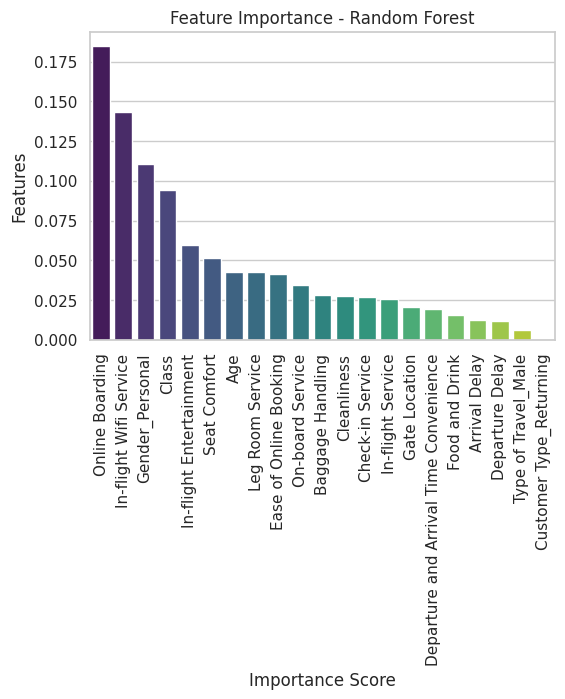

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(y='Importance', x='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.xticks(rotation=90)
plt.ylabel('Features')
plt.show()

In [ ]:
top_features = feature_importances['Feature'][:8].tolist()

In [ ]:
x_train_selected = x_train[top_features]
x_test_selected = x_test[top_features]

In [ ]:
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(x_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_selected.predict(x_test_selected)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.93
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     14690
           1       0.92      0.91      0.92     11286

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



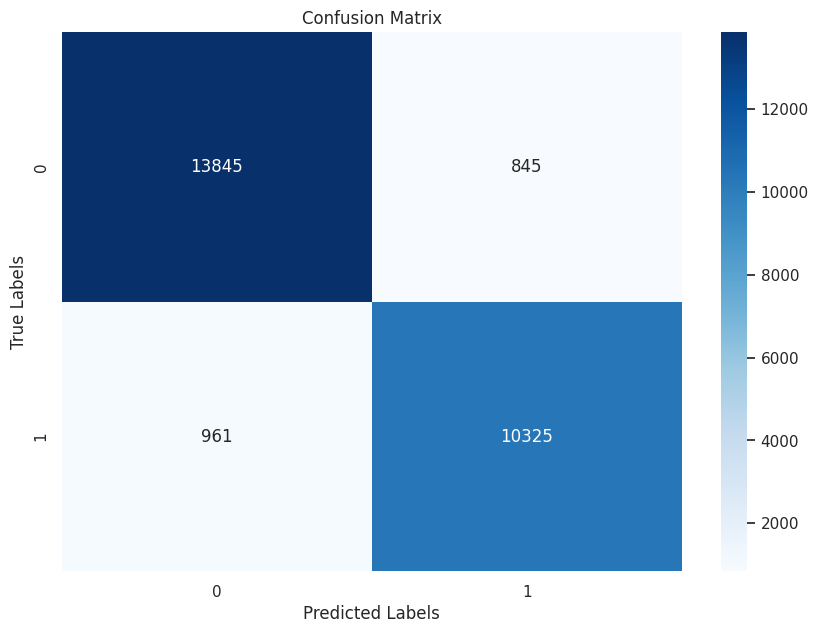

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_gb)
report = classification_report(y_test, y_pred_gb)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.93
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     14690
           1       0.93      0.91      0.92     11286

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



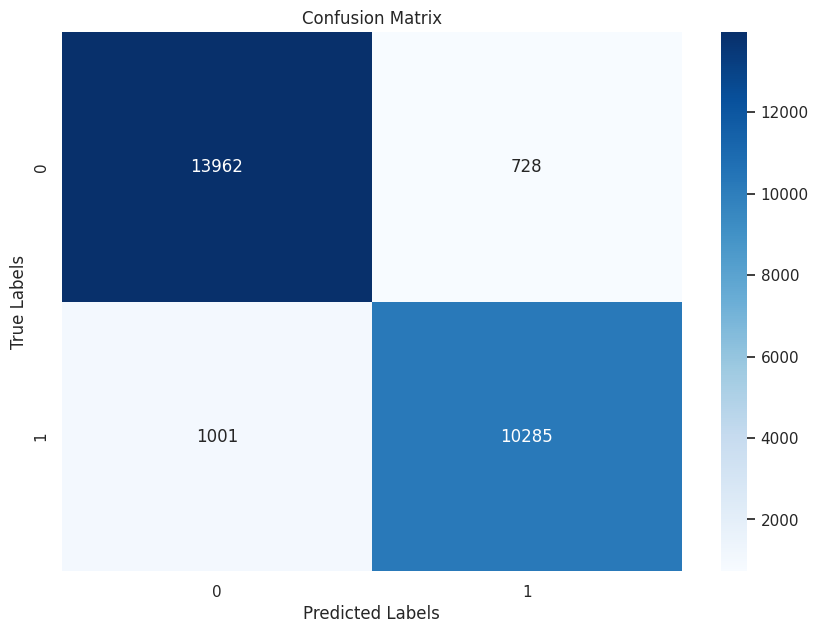

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# XGBoost Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
feature_importances = xgb_model.feature_importances_

In [ ]:
feat_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)
print(feat_importance_df)

                                   Feature  Importance
7                          Online Boarding    0.343317
20                         Gender_Personal    0.179443
15                  In-flight Wifi Service    0.137985
1                                    Class    0.049320
16                 In-flight Entertainment    0.048469
6                         Check-in Service    0.030011
8                            Gate Location    0.027204
11                        Leg Room Service    0.026965
9                         On-board Service    0.025811
12                             Cleanliness    0.024370
10                            Seat Comfort    0.020992
17                        Baggage Handling    0.018554
5                   Ease of Online Booking    0.013641
14                       In-flight Service    0.013332
0                                      Age    0.009866
13                          Food and Drink    0.009001
4   Departure and Arrival Time Convenience    0.007584
3         

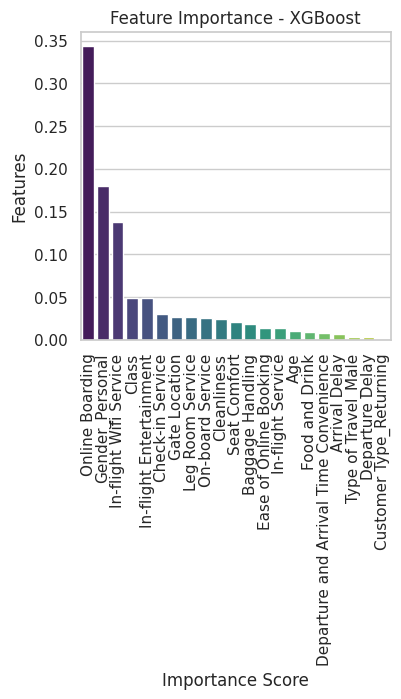

In [ ]:
plt.figure(figsize=(4,4))
sns.barplot(y='Importance', x='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.xticks(rotation=90)
plt.ylabel('Features')
plt.show()

In [ ]:
top_features = feat_importance_df['Feature'][:9].tolist()

In [ ]:
x_train_selected = x_train[top_features]
x_test_selected = x_test[top_features]

In [ ]:
xg_model = XGBClassifier()
xg_model.fit(x_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xg_model.predict(x_test_selected)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.95
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14690
           1       0.95      0.93      0.94     11286

    accuracy                           0.95     25976
   macro avg       0.95      0.94      0.95     25976
weighted avg       0.95      0.95      0.95     25976



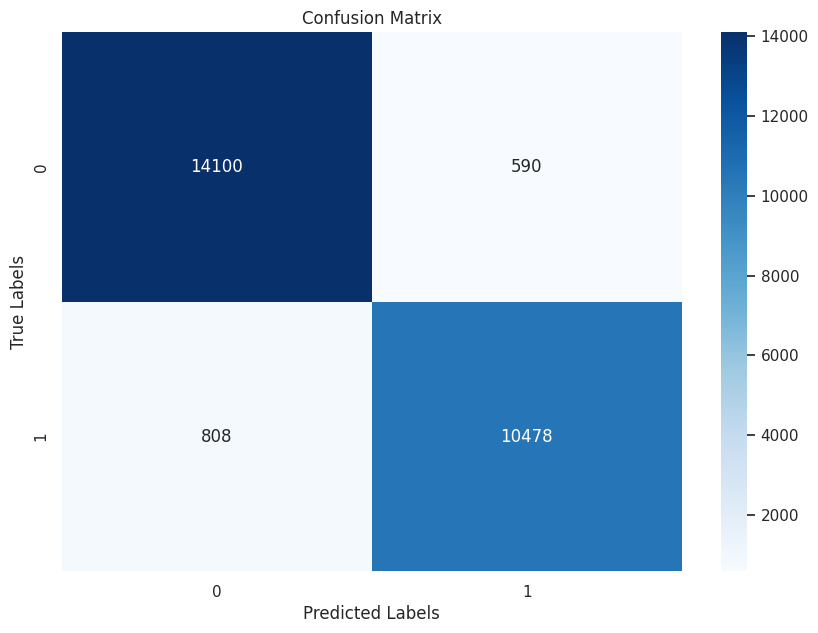

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred_ada = ada_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_ada)
report = classification_report(y_test, y_pred_ada)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

Accuracy 0.91
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     14690
           1       0.90      0.90      0.90     11286

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



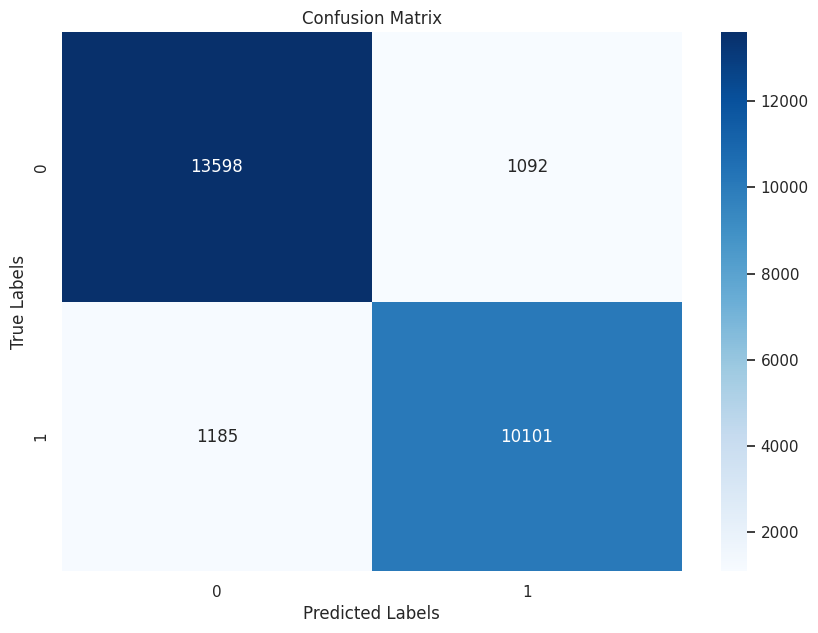

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Random Forest with Hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'auto']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,
    n_jobs=-1,verbose=1)

In [ ]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
y_pred = best_rf.predict(x_test)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9593085925469664

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     14690
           1       0.97      0.94      0.95     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



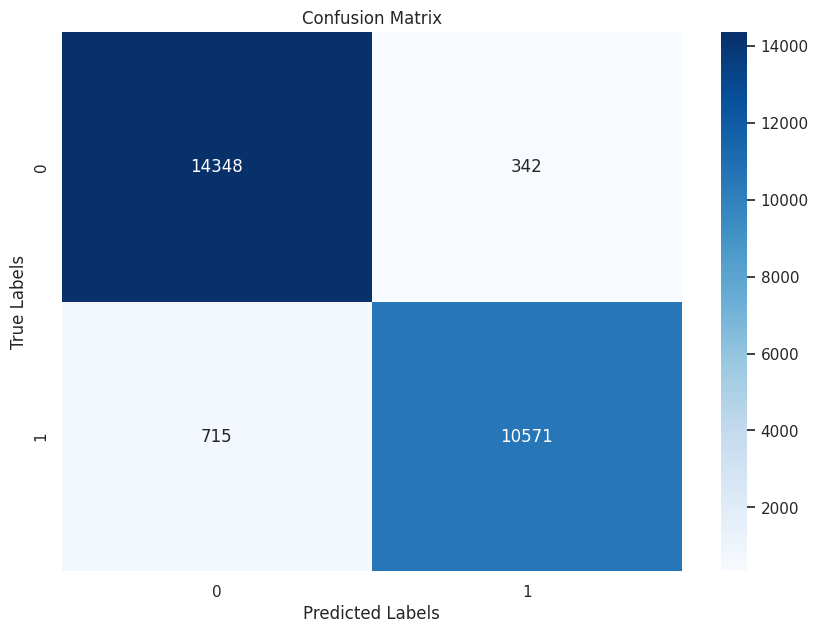

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Model Performance

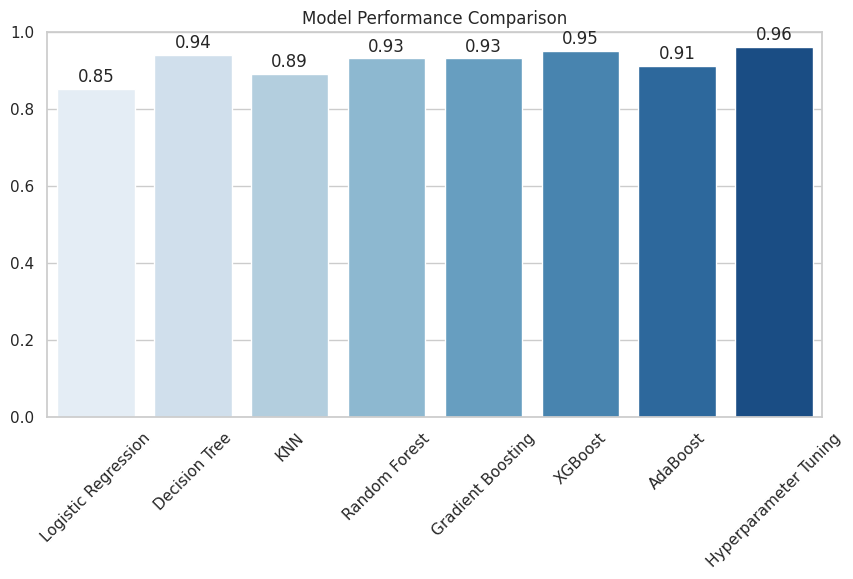

In [ ]:
models = ["Logistic Regression", "Decision Tree", "KNN", "Random Forest",
          "Gradient Boosting", "XGBoost", "AdaBoost",'Hyperparameter Tuning']
accuracy = [0.85, 0.94, 0.89, 0.93, 0.93, 0.95, 0.91,0.96]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=models, y=accuracy, palette="Blues")
for i, v in enumerate(accuracy):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.show()


# Based on the result XGBoost peforms well with 95%. Hyperparameter Tuning gives an accuracy of 96%.

# Improvements

Improve Arrival and Departure Punctuality
Reducing delays in both arrival and departure can significantly increase passenger satisfaction. Analyze historical delay patterns and implement operational improvements to streamline turnaround times.

Address Class-Based Service Gaps
Investigate differences in satisfaction across travel classes (e.g., Economy vs. Business). Tailor services and amenities according to the expectations of each class to reduce dissatisfaction.

Enhance Cleanliness Standards
Cleanliness strongly influences passenger comfort. Regular audits and staff training can help maintain higher hygiene standards in cabins, restrooms, and seat areas.

Improve Online Boarding Experience
Make the digital check-in process smoother and more intuitive. Ensure that the online system is reliable and offers features like seat selection and baggage tracking.

Streamline Baggage Handling
Frequent issues with baggage delay or loss can lead to frustration. Invest in tracking technologies and improve coordination between ground staff and baggage services.

Tailor Communication by Gender Segments
Analyze satisfaction trends by gender to identify and resolve service delivery biases. Ensure that all communication and in-flight offerings are inclusive and considerate of passenger preferences.

Predict and Act on Satisfaction Trends
Use machine learning models to predict satisfaction levels and identify dissatisfied passenger segments. Proactively target these segments with personalized offers or feedback collection strategies.

Segment Customers for Targeted Improvement
Divide the customer base into meaningful segments based on features like delays, class, and online usage. Use this segmentation to deploy customized service upgrades or feedback campaigns.

In-flight entertainment significantly impacts passenger satisfaction by enhancing the overall travel experience. A well-curated entertainment system helps reduce perceived flight time and improves customer comfort, especially on long-haul journeys.